# Principal Component Analysis

Linear Feature Extraction Technique

## Read the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv("./wisconsin_breast_cancer_dataset.csv")

In [7]:
data.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


## Information about the data

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [9]:
y_values = data['diagnosis'].values

In [12]:
X_values = data.iloc[:,2:].values

In [14]:
X_values.shape

(569, 30)

## Standardize the features

In [20]:
means = X_values.mean(axis = 0)

In [19]:
std_devs = X_values.std(axis = 0)

In [28]:
X_std = (X_values - means)/std_devs

In [30]:
X_std.shape

(569, 30)

In [32]:
np.round(X_std.mean(axis = 0))

array([-0.,  0., -0., -0., -0.,  0.,  0., -0.,  0.,  0.,  0., -0., -0.,
       -0., -0.,  0.,  0.,  0.,  0., -0., -0.,  0., -0.,  0., -0., -0.,
        0.,  0.,  0., -0.])

In [33]:
np.round(X_std.std(axis=0))

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

## Calculate the covariance matrix

In [37]:
C = np.corrcoef(X_std.T)

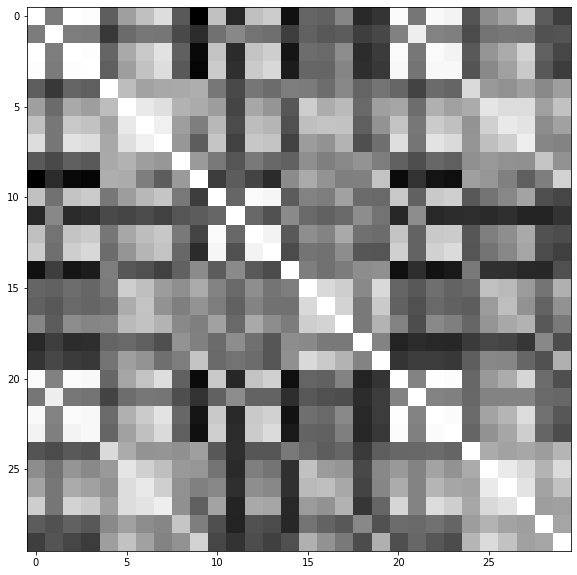

In [39]:
plt.figure(figsize=(10,10))
plt.imshow(C, cmap='gray', interpolation='nearest')
plt.show()

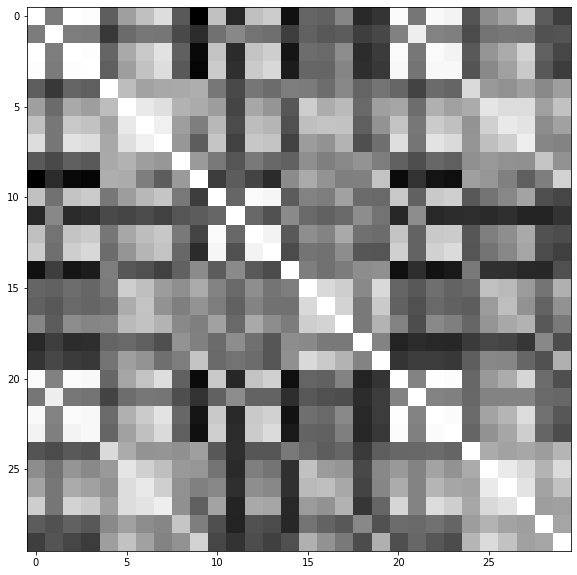

In [41]:
plt.figure(figsize=(10,10))
plt.imshow(np.corrcoef(X_values.T), cmap='gray', interpolation='nearest')
plt.show()

In [42]:
np.allclose(np.corrcoef(X_std.T), np.corrcoef(X_values.T))

True

## Calculate the Eigen values and Eigen Vectors of Covariance Matrix

In [43]:
w, v = np.linalg.eig(C)

In [49]:
v.shape

(30, 30)

## Scree plot (with normalized values of eigen values)

In [50]:
sum_of_eig_values = np.sum(w)

In [52]:
w_norm = w / sum_of_eig_values

In [55]:
explained_variance = np.cumsum(w_norm)

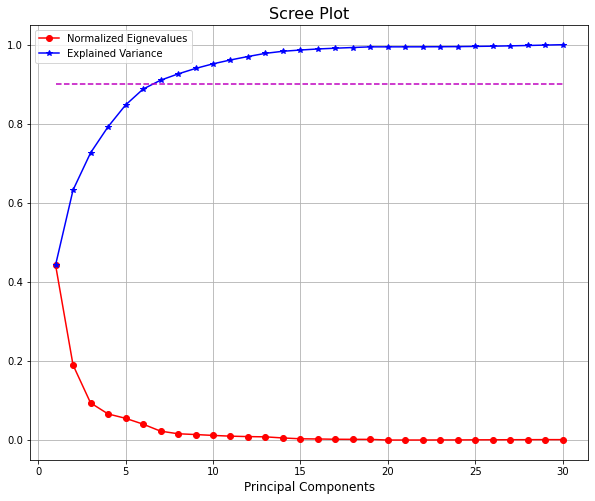

In [63]:
plt.figure(figsize=(10,8))
plt.plot(np.arange(1, len(w_norm)+1), w_norm, 'ro-', label='Normalized Eignevalues')
plt.plot(np.arange(1, len(w_norm)+1), explained_variance, 'b*-', label='Explained Variance')
plt.grid()
plt.title("Scree Plot", fontsize=16)
plt.xlabel("Principal Components", fontsize=12)
plt.plot(np.arange(1, len(w_norm)+1), [0.9]*len(w_norm), linestyle='dashed', color='m')
plt.legend()
plt.show()

## Select the number of components

From the scree plot we can see that first 7 eigen values will explain more than 90% of the variance in the dataset.

k = 7

In [70]:
k = 7

U = v[:,:k]

In [71]:
U.shape

(30, 7)

## Transform the dataset

In [72]:
X_transform = np.dot(X_std, U)

In [73]:
X_transform.shape

(569, 7)

This X_transform we can use for further downstream tasks (classification)

## Visualize the data in 2D

We will take first two principal components and project the data along these two components

In [74]:
X_tr_viz = np.dot(X_std, v[:,:2])

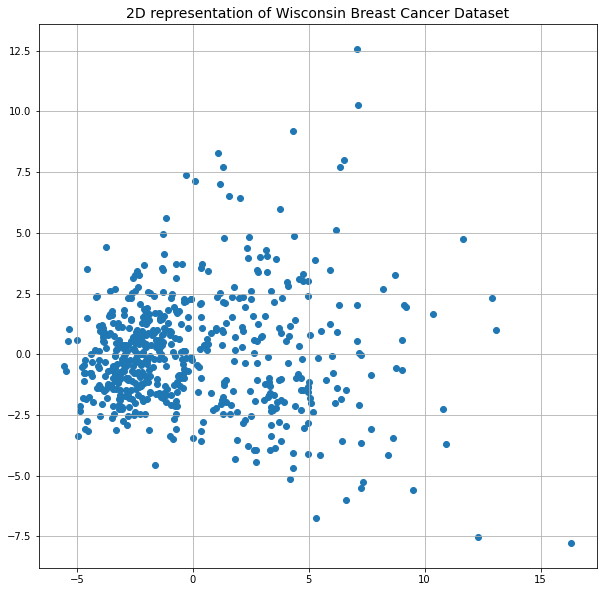

In [76]:
plt.figure(figsize=(10,10))
plt.scatter(X_tr_viz[:,0], X_tr_viz[:,1])
plt.grid()
plt.title("2D representation of Wisconsin Breast Cancer Dataset", fontsize=14)
plt.show()

In [77]:
import seaborn as sns

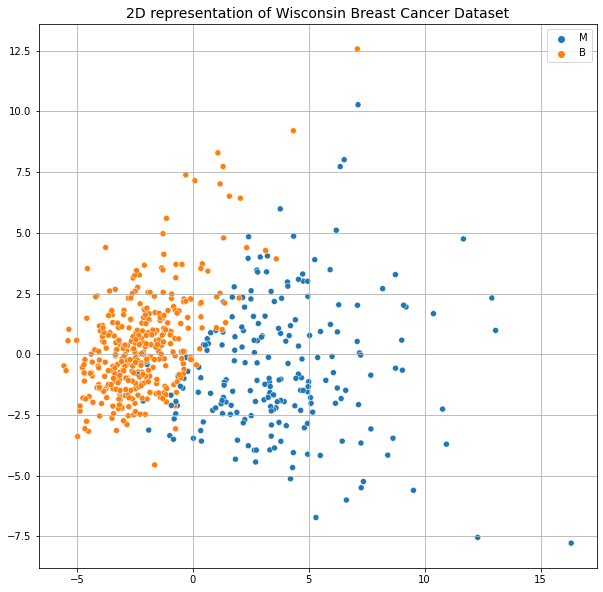

In [79]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=X_tr_viz[:,0], y=X_tr_viz[:,1], hue=y_values)
plt.grid()
plt.title("2D representation of Wisconsin Breast Cancer Dataset", fontsize=14)
plt.show()